In [1]:
import os
os.chdir('../')
from solution import *

In [2]:
data_dir = os.curdir
output_dir = os.curdir
raw_train_data = np.load(os.path.join(data_dir, 'train_data.npz'))
x_train = torch.from_numpy(raw_train_data['train_x']).reshape([-1, 784])
y_train = torch.from_numpy(raw_train_data['train_y']).long()
dataset_train = torch.utils.data.TensorDataset(x_train, y_train)

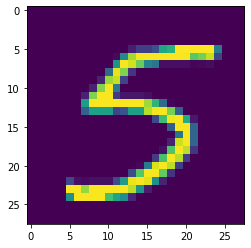

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0].reshape(28,28))

In [4]:
run_solution(dataset_train, data_dir=data_dir, output_dir=output_dir, model=Model(batch_size=16, use_densenet=False))

Using a BayesNet model
initialising bayesian layer of size 784 x 100
initialising bayesian layer of size 100 x 100
initialising bayesian layer of size 100 x 10
Training model
Model starting to train


  0%|                                                                                                                                                                         | 0/100 [00:00<?, ?it/s]

epoch number 0
doing loss
tensor(nan)
loss tensor(nan, grad_fn=<SubBackward0>)
doing backward


  0%|                                                                                                                                                    | 0/100 [00:00<?, ?it/s, acc=0.125, loss=nan]

doing loss
tensor(nan)
loss tensor(nan, grad_fn=<SubBackward0>)
doing backward
doing loss


RuntimeError: The size of tensor a (10) must match the size of tensor b (9) at non-singleton dimension 1

In [ ]:
loss = pi_i * (torch.sum(f[2]) - torch.sum(f[1])) - torch.sum( torch.log( torch.matmul( f[0], F.one_hot(batch_y))))

In [6]:
a = torch.Tensor([[1., 2.], [3., 4.], [5., 6.]])
b = torch.Tensor([[1., 0.], [1., 4.], [5., 6.]])

In [7]:
print(a)
print(b)
print(a * b)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[1., 0.],
        [1., 4.],
        [5., 6.]])
tensor([[ 1.,  0.],
        [ 3., 16.],
        [25., 36.]])


In [8]:
torch.sum(a*b, dim=1)

tensor([ 1., 19., 61.])

In [11]:
m = torch.nn.Softmax(dim=1)
m(a*b)

tensor([[7.3106e-01, 2.6894e-01],
        [2.2603e-06, 1.0000e+00],
        [1.6701e-05, 9.9998e-01]])

In [30]:
gauss2 = torch.distributions.multivariate_normal.MultivariateNormal(torch.Tensor([0.0, 0.0]),
                                                                    torch.Tensor([[1.0, 0.5], [0.5, 1.0]]))

In [20]:
torch.log(torch.max(torch.tensor(1e-5).expand_as(a*b), a*b))

tensor([[  0.0000, -11.5129],
        [  1.0986,   2.7726],
        [  3.2189,   3.5835]])

In [14]:
gauss2.log_prob(torch.Tensor([[0.0, 0.1], [-0.1, 0.0]]))

tensor([-1.7007, -1.7007])

In [15]:
gauss2.log_prob(torch.Tensor([[0.0, 0.1], [-0.1, 0.0], [1.0, 1.0]]))

tensor([-1.7007, -1.7007, -2.3607])

In [16]:
gauss2.sample()

tensor([ 0.0013, -0.3700])

In [26]:
rho = torch.Tensor([0.0, 0.1, 0.5, 1.0])
softplus = torch.nn.Softplus()
foo = softplus(rho)
print(foo)

tensor([0.6931, 0.7444, 0.9741, 1.3133])


In [31]:
torch.diag(foo)

tensor([[0.6931, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.7444, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.9741, 0.0000],
        [0.0000, 0.0000, 0.0000, 1.3133]])

tensor([[0.6931, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.7444, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.9741, 0.0000],
        [0.0000, 0.0000, 0.0000, 1.3133]])

In [7]:
from torch.distributions import Normal, Independent

In [22]:
loc = torch.zeros(3)
scale = torch.Tensor([1.0, 100., 10000.])
normal = Normal(loc, scale)
diagn = Independent(normal, 1)

In [23]:
diagn

Independent(Normal(loc: torch.Size([3]), scale: torch.Size([3])), 1)

In [24]:
diagn.sample()

tensor([6.1113e-01, 4.9921e+01, 3.4691e+03])

In [25]:
diagn.log_prob(torch.Tensor([0.4413, 0.3410, 1.2428]))

tensor(-16.6697)

In [5]:
loc = torch.ones(10)

In [6]:
loc.reshape(5,2)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])